# Лабораторная работа №6
## Жадная стратегия и динамическое программирование

## Задание  №1
Предположим, что вы собираетесь в турпоход. У вас есть рюкзак, емкость которого
составляет 6 фунтов, и список предметов, которые вы можете положить с собой в рюкзак.
У каждого предмета есть вес и ценность. Чем выше ценность, тем важнее для вас предмет.
Нарисуйте и вручную заполните таблицу, которая даст оптимальный набор предметов для
похода и общую ценность получившегося рюкзака. Ориентируйтесь на алгоритм
динамического программирования, описанный в лекции.
Список предметов возьмите согласно вашему варианту

Вариант 4.
1. вода, 2 фунта, 6;
2. книга, 1 фунт, 3;
3. еда, 4 фунта, 9;
4. куртка, 1 фунт, 5;
5. камера, 3 фунта, 6 

| |1|2|3|4|5|6|
|-|-|-|-|-|-|-|
|вода| |вода(6)|вода(6)|вода(6)|вода(6)|вода(6)|
|книга|книга(3)|вода(6)|вода(6)+книга(3)|вода(6)+книга(3)|вода(6)+книга(3)|вода(6)+книга(3)|
|еда|книга(3)|вода(6)|вода(6)+книга(3)|еда(9)|еда(9)+книга(3)|еда(9)+вода(6)|
|куртка|куртка(5)|куртка(5)+книга(3)|куртка(5)+вода(6)|вода(6)+книга(3)+куртка(5)|еда(9)+куртка(5)|еда(9)+книга(3)+куртка(5)|
|камера|куртка(5)|куртка(5)+книга(3)|куртка(5)+вода(6)|вода(6)+книга(3)+куртка(5)|камера(6)+куртка(5)+книга(3)|куртка(5)+вода(6)+камера(6)|

## Задание  №2
Напишите программу, которая моделирует задачу о рюкзаке. Пользователь вводит объем
рюкзака и список предметов с указанием их веса и ценности. Вам необходимо подобрать
набор предметов максимальной ценности, которые поместятся в рюкзаке. Реализуйте три
варианта решения этой задачи:

1. Полный перебор
2. Жадный алгоритм
3. Динамическое программирование

Укажите вычислительная сложность (в O-нотации) для каждого алгоритма. Постройте
графики возрастания времени выполнения алгоритмов при увеличении входных данных.
Приведите примеры входных данных, когда жадный алгоритм дает оптимальное решение
и когда дает неоптимальное решение.

In [1]:
from itertools import chain, combinations
import random
import timeit
import matplotlib.pyplot as plt

In [2]:
backpack = [
    ['вода', 2, 6],
    ['книга', 1, 3],
    ['еда', 4, 9],
    ['куртка', 1, 5],
    ['камера', 3, 6]
]

backpack_size = 6

In [3]:
def combo(l):
    result = []
    for i in  chain.from_iterable(combinations(l, r) for r in range(1, len(l)+1)):
        result.append([*i])
    return result

def full_search(backpack, backpack_size):
    max_value = 0
    max_items = None
    comboo = combo(backpack)
    for comb in comboo:
        capacity = 0
        value = 0
        items = []
        for item in comb:
            capacity += item[1]
            value += item[2]
            items.append(item[0])
        if value >= max_value and capacity <= backpack_size:
            max_value = value
            max_items = items
    del comboo
    print(max_value)
    print(max_items)
            
full_search(backpack, backpack_size)

17
['книга', 'еда', 'куртка']


In [4]:
def greedy_algorithm(backpack, backpack_size):
    temp_value = 0
    temp_capacity = 0
    temp_items = []
    for item in backpack:
        if item[1] + temp_capacity <= backpack_size:
            temp_capacity += item[1]
            temp_value += item[2]
            temp_items.append(item[0])
        elif item[1] <= backpack_size and item[2] >= temp_value:
            temp_capacity = item[1]
            temp_value = item[2]
            temp_items = [item[0]]
    print(temp_value)
    print(temp_items)
    
greedy_algorithm(backpack, backpack_size)

14
['еда', 'куртка']


In [5]:
def dynamic_algorithm(backpack, backpack_size):
    name = [item[0] for item in backpack]
    n = len(backpack)
    w = [item[1] for item in backpack]
    p = [item[2] for item in backpack]
    bag = [[0] * (backpack_size + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for k in range(1, backpack_size + 1):
            if k >= w[i-1]:
                bag[i][k] = max(bag[i-1][k], bag[i-1][k-w[i-1]] + p[i-1])
            else:
                bag[i][k] = bag[i-1][k]
    temp_items = []
    k = backpack_size
    temp_value = 0
    for i in range(n, 0, -1):
        if bag[i][k] != bag[i-1][k]:
            temp_items.append(name[i-1])
            k -= w[i-1]
            temp_value = temp_value + p[i-1]
    print(temp_value)
    print(temp_items)
        
dynamic_algorithm(backpack, backpack_size)

17
['куртка', 'еда', 'книга']


4
['test']
4
['test']
15
['test', 'test']
20
['test', 'test', 'test']
9
['test', 'test']
15
['test', 'test', 'test']
11
['test', 'test', 'test']
41
['test', 'test', 'test', 'test', 'test']
15
['test', 'test', 'test']
52
['test', 'test', 'test', 'test', 'test', 'test']
13
['test', 'test', 'test']
60
['test', 'test', 'test', 'test', 'test', 'test']
20
['test', 'test']
60
['test', 'test', 'test', 'test', 'test', 'test']
7
['test']
10
['test']
23
['test', 'test', 'test', 'test', 'test']


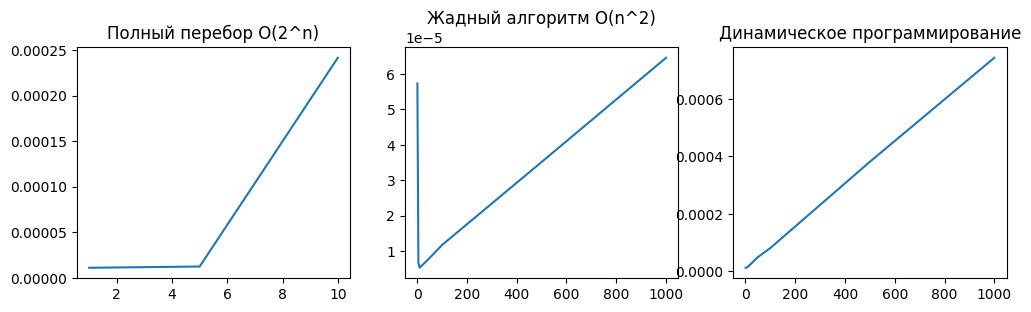

In [6]:
example_range = [1, 5, 10, 50, 100, 500, 1000]
example_items = []
max_size = 6
time = [[], [], []]
for i in example_range:
    example_items = []
    for j in range(i):
        example_items.append(['test', random.randint(1, max_size), random.randint(1, 10)])
    time[1].append(timeit.timeit(f"greedy_algorithm({example_items}, {max_size})", number=1, globals=globals()))
    time[2].append(timeit.timeit(f"dynamic_algorithm({example_items}, {max_size})", number=1, globals=globals()))
for i in example_range[:3]:
    example_items = []
    for j in range(i):
        example_items.append(['test', random.randint(1, max_size), random.randint(1, 10)])
    time[0].append(timeit.timeit(f"full_search({example_items}, {max_size})", number=1, globals=globals()))
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
ax1, ax2, ax3 = axes
ax1.plot(example_range[:3], time[0])
ax2.plot(example_range, time[1])
ax3.plot(example_range, time[2])
ax1.set_title('Полный перебор O(2^n)')
ax2.set_title('Жадный алгоритм O(n^2)')
ax3.set_title('Динамическое программирование')
plt.show()

## Задание  №3

Нарисуйте и вручную заполните таблицу для вычисления самой длинной общей подстроки
между строками blue и clue. Ориентируйтесь на алгоритм динамического
программирования, описанный в лекции.

|   | b | l | u | e |
|---|---|---|---|---|
| c | 0 | 0 | 0 | 0 |
| l | 0 | 1 | 0 | 0 |
| u | 0 | 0 | 2 | 0 |
| e | 0 | 0 | 0 | 3 |

## Задание  №4

Напишите программу, реализующую алгоритм нахождения самой длинной общей
подстроки из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов.
Ваша программа должна вывести самое похожее слово согласно данному алгоритму.

In [7]:
word = 'hish'
similar = ['fish', 'fortt', 'diff', 'hosh', 'heee']

def substring(word1, word2):
    cell = [[0] * len(word2) for _ in range(len(word1))]
    count = 0
    last_index = None
    for i in range(len(word1)):
        for j in range(len(word2)):
            if word1[i] == word2[j] and i == j:
                cell[i][j] = cell[i - 1][j - 1] + 1
                if cell[i][j] > count:
                    count = cell[i][j]
                    last_index = i
    #return count, word[last_index - count  + 1: last_index + 1]
    return count

sub = {}
for w in similar:
    sub[w] = substring(word, w)

print("Слово: ", word)
sorted_sub = sorted(sub.items(), key=lambda x: -x[1])
for name, count in sorted_sub:
    print(name, count, sep=' <-> ')

print("Ответ: ", sorted_sub[0][0])

Слово:  hish
fish <-> 3
hosh <-> 2
diff <-> 1
heee <-> 1
fortt <-> 0
Ответ:  fish


## Задание  №5

Напишите программу, реализующую алгоритм нахождения самой длинной общей
подпоследовательности из лекции. Пользователь вводит слово с ошибкой и далее список
похожих слов. Ваша программа должна вывести самое похожее слово согласно данному
алгоритму.

In [8]:
word = 'fish'
similar = ['fortt', 'diff', 'hosh', 'heee', 'fosh']

def substring(word1, word2):
    cell = [[0] * len(word2) for _ in range(len(word1))]
    for i in range(len(word1)):
        for j in range(len(word2)):
            if word1[i] == word2[j]:
                cell[i][j] = cell[i - 1][j - 1] + 1
            else:
                cell[i][j] = max(cell[i - 1][j], cell[i][j - 1])
    return cell[len(word1) - 1][len(word2) - 1]

sub = {}
for w in similar:
    sub[w] = substring(word, w)

print("Слово: ", word)
sorted_sub = sorted(sub.items(), key=lambda x: -x[1])
for name, count in sorted_sub:
    print(name, count, sep=' <-> ')

print("Ответ: ", sorted_sub[0][0])

Слово:  fish
fosh <-> 3
hosh <-> 2
fortt <-> 1
diff <-> 1
heee <-> 1
Ответ:  fosh


## Задание  №6

-

## Задание  №7

Есть купюры и монеты номиналами: 1, 3, 4, 10, 50, 100. В банкомате неограниченное
количество купюр и монет каждого номинала. Мы хотим снять со счета n рублей. Нужно
вывести на экран минимальный набор купюр и монет, который может выдать банкомат,
чтобы сумма получилась ровно n.
1. Напишите жадный алгоритм решения задачи. Подсказка: выбирайте купюры и
монеты по убыванию номинала.
2. Используйте динамическое программирование, чтобы рассчитать минимальное
количество требуемых купюр и монет.
3. Приведите пример входных данных, когда жадный алгоритм выдает не оптимальное
решение.

In [9]:
denominations = [1, 3, 4, 10, 50, 100]
n = int(input('Деняк: '))

Деняк: 123


In [10]:
def greedy_algorithm(demoninations, n):
    result = {}
    for denomination in denominations[::-1]:
        count = n // denomination
        if count > 0:
            result[denomination] = count
        n %= denomination
    return result
        
print(greedy_algorithm(denominations, n))

{100: 1, 10: 2, 3: 1}


In [11]:
def dynamic_algorithm(demoninations, n):
    lookup = [float("inf")] * (n + 1)
    lookup[0] = 0
    for m in range(1, n + 1):
        for i in range(len(demoninations)):
            if m >= demoninations[i] and lookup[m - demoninations[i]] + 1 < lookup[m]:
                lookup[m] = lookup[m - demoninations[i]] + 1
    result = {}
    while (n > 0):
        for i in range(len(demoninations)):
            if lookup[n - demoninations[i]] == lookup[n] - 1:
                n -= demoninations[i]
                if demoninations[i] in result:
                    result[demoninations[i]] += 1
                else:
                    result[demoninations[i]] = 1
                break
    return result

print(dynamic_algorithm(denominations, n))

{3: 1, 10: 2, 100: 1}


## Задание  №8

Напишите программу, моделирующую работу клиентов с банкоматом. В банкомате есть
купюры и монеты номиналами: 1, 3, 4, 10, 50, 100, но, в отличие от предыдущей задачи, их
количество конечно.
В начале работы программы вы задаете:
    
 количество клиентов

 для каждого клиента количество рублей, которые он хочет снять (считаем, что эта
сумма всегда корректна и имеется на счету клиента)

 изначальное количество купюр и монет в банкомате

Далее вы по очереди обрабатываете запросы клиентов. Для каждого клиента выведите на
экран минимальный набор купюр и монет для его суммы или сообщение о невозможности
предоставить данную суммы из-за нехватки купюр и монет. Если минимальный набор
найден успешно, то вычтите его из запасов банкомата и выведите на экран получившейся
остаток.
Проведите несколько запусков программы с разными начальными данными и различными
исходами работы с банкоматом.

In [14]:
bank = {
    1: 10,
    3: 5,
    4: 4,
    10: 10,
    50: 3,
    100: 4,
}

denominations = [1, 3, 4, 10, 50, 100]

clients_num = int(input("Кол-во клиентов: "))

for c in range(clients_num):
    print("Клиент", c + 1, '\n')
    sum = int(input("Сумма: "))
    lookup = [float("inf")] * (sum + 1)
    lookup[0] = 0
    for m in range(1, sum + 1):
        for i in range(len(denominations)):
            if m >= denominations[i] and lookup[m-denominations[i]] + 1 < lookup[m]:
                lookup[m] = lookup[m-denominations[i]] + 1

    result = {}
    while (sum > 0):
        for i in range(len(denominations)):
            if lookup[sum - denominations[i]] == lookup[sum] - 1:
                sum -= denominations[i]
                if denominations[i] in result:
                    result[denominations[i]] += 1
                else:
                    result[denominations[i]] = 1
                break

    result_keys = list(result.keys())
    bank_c = bank.copy()

    status = True
    for denomination in result_keys:
        bank_c[denomination] -= result[denomination]
        if bank_c[denomination] < 0:
            status = False
            break
    if status:
        bank = bank_c
        sorted_tuple = sorted(result.items(), key=lambda x: -x[0])
        print("Выдача: ", dict(sorted_tuple))
        print("Банк:", bank, '\n')
    else:
        print("Сумму выдать невозможно")

Кол-во клиентов: 2
Клиент 1 

Сумма: 456
Выдача:  {100: 4, 50: 1, 3: 2}
Банк: {1: 10, 3: 3, 4: 4, 10: 10, 50: 2, 100: 0} 

Клиент 2 

Сумма: 123
Сумму выдать невозможно
